In [1]:
!pip install ucimlrepo

In [6]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing data

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

X = X.drop(columns=['odor', 'stalk-root', 'ring-type', 'spore-print-color', 'population', 'habitat'])

# One-hot encode the features

In [8]:
# One-Hot Encoding of categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode the target variable (assuming 'p' = poisonous, 'e' = edible)
y_series = y.squeeze()
y_encoded = y_series.apply(lambda x: 1 if x == 'p' else 0)
'''
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
y_train_encoded = y_train['poisonous'].apply(lambda p: 1 if p=='p' else 0).to_numpy()
X_train_encoded.shape, y_train_encoded.shape
'''

"\nencoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)\nX_train_encoded = encoder.fit_transform(X_train)\ny_train_encoded = y_train['poisonous'].apply(lambda p: 1 if p=='p' else 0).to_numpy()\nX_train_encoded.shape, y_train_encoded.shape\n"

# Split into train and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
print('X train:', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train: (6499, 60)
y train (6499,)
X test (1625, 60)
y test (1625,)


# Train the model

In [14]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best parameters and evaluate the model
print("Best Parameters:", grid_search.best_params_)

# Use the best model to predict on test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


# Evaluate best model

Random Forest:
Accuracy: 0.9969
Precision: 0.9962
Recall: 0.9974
F1 Score: 0.9968


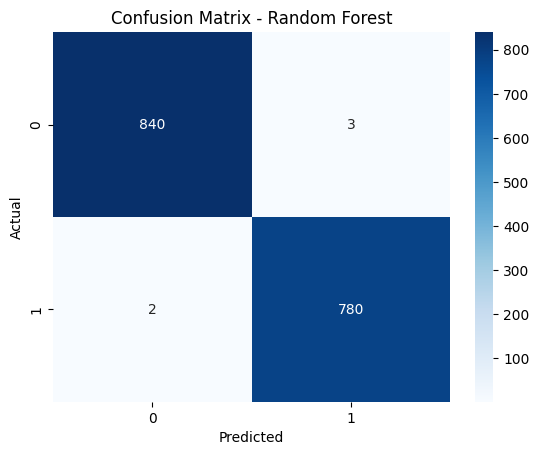

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

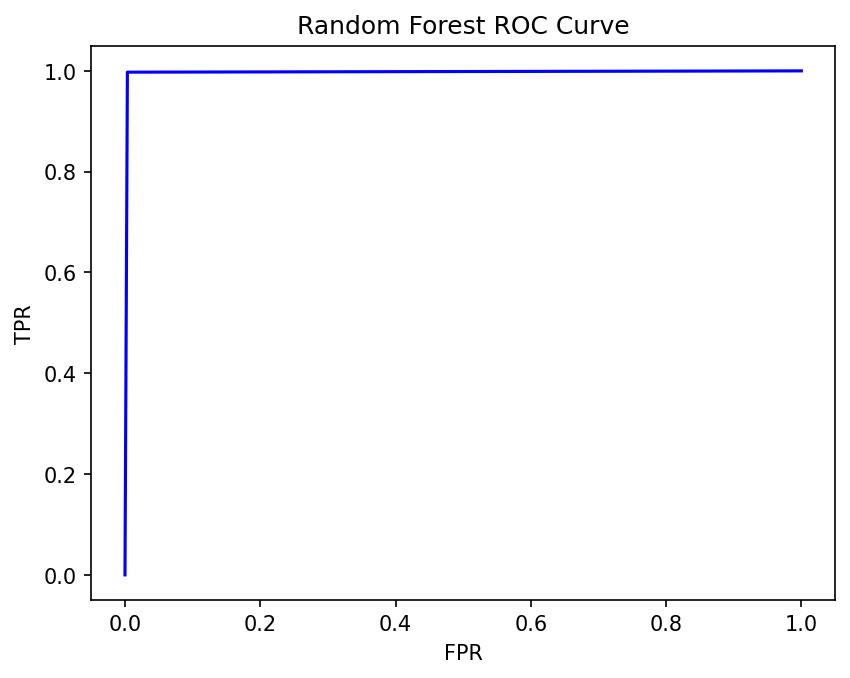

In [18]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(dpi=150)
sns.lineplot(x=fpr, y=tpr, color='blue', ax=ax)
ax.set_title('Random Forest ROC Curve')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

plt.show()